In [61]:
# Import dependencies
from citipy import citipy
import pandas as pd
import numpy as np
import json 
import requests
import time

import matplotlib.pyplot as plt
from datetime import datetime
from config import weather_api_key

In [27]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [28]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [29]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [30]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=071a9b7f20d73f3590e397c7e43f09b7


In [31]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | babanusah
City not found. Skipping...
Processing Record 8 of Set 1 | labuhan
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | huarmey
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | saint-augustin
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 17 of Set 1 | hirara
Processing Record 18 of Set 1 | bac lieu
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | kavaratti
P

Processing Record 37 of Set 4 | zholymbet
Processing Record 38 of Set 4 | aykhal
Processing Record 39 of Set 4 | cidreira
Processing Record 40 of Set 4 | chokurdakh
Processing Record 41 of Set 4 | constitucion
Processing Record 42 of Set 4 | tambun
Processing Record 43 of Set 4 | santa cruz de tenerife
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | cherskiy
Processing Record 46 of Set 4 | pathein
Processing Record 47 of Set 4 | doctor pedro p. pena
City not found. Skipping...
Processing Record 48 of Set 4 | skibbereen
Processing Record 49 of Set 4 | tahta
Processing Record 50 of Set 4 | chapais
Processing Record 1 of Set 5 | panacan
Processing Record 2 of Set 5 | ambon
Processing Record 3 of Set 5 | hamilton
Processing Record 4 of Set 5 | mar del plata
Processing Record 5 of Set 5 | kerewan
Processing Record 6 of Set 5 | san policarpo
Processing Record 7 of Set 5 | kasongo-lunda
Processing Record 8 of Set 5 | alegre
Processing Record 9 of Set 5 | attawapiskat


Processing Record 28 of Set 8 | asbury park
Processing Record 29 of Set 8 | nanortalik
Processing Record 30 of Set 8 | guerrero negro
Processing Record 31 of Set 8 | los llanos de aridane
Processing Record 32 of Set 8 | mecca
Processing Record 33 of Set 8 | carauari
Processing Record 34 of Set 8 | semporna
Processing Record 35 of Set 8 | yeniseysk
Processing Record 36 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 37 of Set 8 | arlit
Processing Record 38 of Set 8 | dingle
Processing Record 39 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 8 | ciechanow
Processing Record 41 of Set 8 | kuandian
Processing Record 42 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 43 of Set 8 | gizo
Processing Record 44 of Set 8 | garden city
Processing Record 45 of Set 8 | visby
Processing Record 46 of Set 8 | kefamenanu
Processing Record 47 of Set 8 | taksimo
Processing Record 48 of Set 8 | fort nelson
Processing Record 49 of Set 8 | phon
Processi

Processing Record 14 of Set 12 | hofn
Processing Record 15 of Set 12 | saint-louis
Processing Record 16 of Set 12 | pangoa
Processing Record 17 of Set 12 | grootegast
Processing Record 18 of Set 12 | kabompo
Processing Record 19 of Set 12 | nabire
Processing Record 20 of Set 12 | turukhansk
Processing Record 21 of Set 12 | ossora
Processing Record 22 of Set 12 | springfield
Processing Record 23 of Set 12 | kiama
Processing Record 24 of Set 12 | cap malheureux
Processing Record 25 of Set 12 | fuengirola
Processing Record 26 of Set 12 | santa ana
Processing Record 27 of Set 12 | pueblo
Processing Record 28 of Set 12 | kokkola
Processing Record 29 of Set 12 | palmas bellas
Processing Record 30 of Set 12 | winchester
Processing Record 31 of Set 12 | ati
Processing Record 32 of Set 12 | riyadh
Processing Record 33 of Set 12 | zaqatala
Processing Record 34 of Set 12 | oak harbor
Processing Record 35 of Set 12 | barsovo
Processing Record 36 of Set 12 | gualdo tadino
Processing Record 37 of Se

In [33]:
#convert the arry of dictonaries to a pandas Dataframe.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,-8.9266,125.4092,68.68,82,99,2.13,TL,2022-01-07 01:34:19
1,Butaritari,3.0707,172.7902,82.44,77,92,16.08,KI,2022-01-07 01:34:19
2,Atuona,-9.8000,-139.0333,78.10,73,55,13.00,PF,2022-01-07 01:33:53
3,Ushuaia,-54.8000,-68.3000,49.66,50,20,24.16,AR,2022-01-07 01:31:27
4,Saldanha,-33.0117,17.9442,64.45,86,54,7.65,ZA,2022-01-07 01:34:20
5,Labuhan,-6.8844,112.2051,82.81,73,96,6.55,ID,2022-01-07 01:34:21
6,Georgetown,5.4112,100.3354,82.89,81,20,1.01,MY,2022-01-07 01:33:46
7,Huarmey,-10.0681,-78.1522,70.23,86,95,7.74,PE,2022-01-07 01:34:21
8,Thompson,55.7435,-97.8558,-18.87,94,13,7.09,CA,2022-01-07 01:27:35
9,Punta Arenas,-53.1500,-70.9167,53.71,54,0,11.50,CL,2022-01-07 01:30:33


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [75]:
# Extract relevent fields from the DataFrame fro plotting.
lats = city_data_df["Lat"]
max_temps =city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

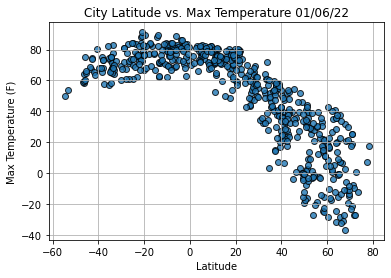

In [76]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

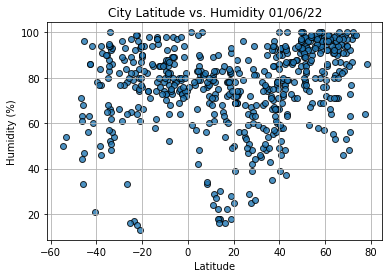

In [78]:
# Import time module
import time

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

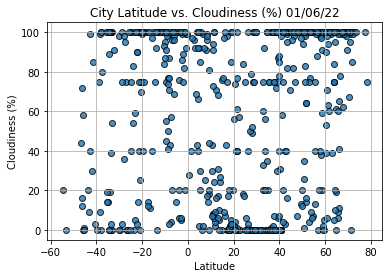

In [79]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

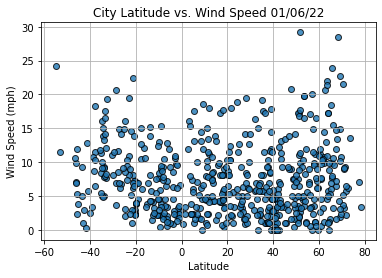

In [80]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()